# Signals - 101

Notebook ini akan menjelaskan bagaimana cara mengenali dan bekerja dalam Python. Kita akan belajar bagaimana cara membuat sinyal dan memvisualisasikannya.

## Apa itu sinyal
Sinyal adalah salah bentuk visualisasi data yang berubah seiring waktu. Kasarnya 

$$
\text{sinyal} = \frac{value}{time}
$$

Contoh sederhananya, lihat grafik IPK kalian di SIAKAD, IPK merupakan kombinasi dari nilai IP kalian sejak masuk kuliah.

Sinyal dapat berupa suara, gambar atau data lain, selagi data tersebut akan berubah seiring berjalannya waktu. 

## Sinyal Sinusoidal
Sinyal Sinusoidal adalah sinyal yang menghasilkan osilasi periodik secara halus, sehingga cocok digunakan sebagai sinyal dasar dalam pengolahan sinyal. Biasanya fungsi `Sinus` dan `Cosinus` yang menghasilkan nilai pada rentang [-1, 1] 

$$
\text{sinyal} = 
    \begin{cases}
        \sin \theta \\
        \cos \theta
    \end{cases}
$$

dimana, $\theta$ merupakan
$$
\theta = 2 \pi f t
$$

dengan 
- `f` (frekuensi) adalah jumlah siklus gelombang (bagian puncak dan lembah) dalam satu detik (Hz / $\frac{unit}{seconds}$)
- `t` (time) merupakan waktu dalam satuan detik (Seconds)


### Visualisasi Sinyal Sinusoidal

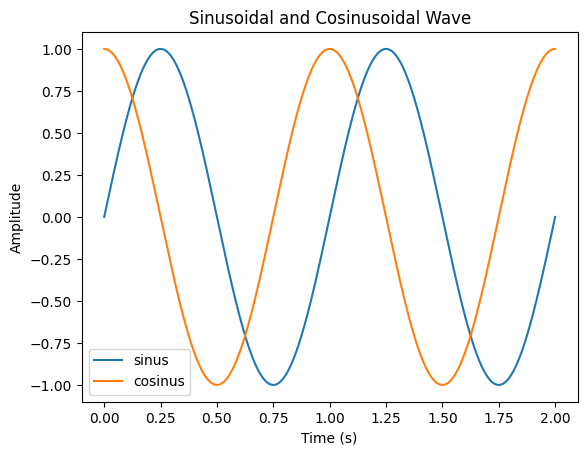

In [ ]:
## Import dependencies
import numpy as np
import matplotlib.pyplot as plt

## Setup Frequency and Time
f = 5 # Jumlah gelombang dalam satu detik

## np.linspace bekerja dengan cara membuat array / point dari 0 - 1 detik
t = np.linspace(0, 1, 1000) # 1000 sampel point dalam 1 detik

## Membuat gelombang sinus
y = np.sin(2 * np.pi * f * t)

## Membuat gelombang cosinus
y2 = np.cos(2 * np.pi * f * t)

## Membuat plot
plt.plot(t, y, label='sinus')
plt.plot(t, y2, label='cosinus')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal and Cosinusoidal Wave')
plt.legend()
plt.show()



## Sinyal Kompleks
**Definisi**:
Sinyal kompleks adalah sinyal yang memiliki bagian real dan imajiner, dan dapat di representasikan dalam bentuk `euler formula` berikut

$$
e^{j\theta} = \cos\theta + j \sin\theta
$$
$$
e^{j 2 \pi f t} = \cos\theta + j \sin\theta
$$

dimana `j` adalah bilangan imaginer. 

Mengapa ada bilangan imaginer? Bagian notebook [berikut](euler-trivia.ipynb) akan menjelaskan mengapa pengolahan sinyal digital menggunakan $e^{j\theta}$

Complex signal terdiri dari:
- Bagian real: $\cos(2 \pi f t)$
- dan Bagian imajiner: $\sin(2 \pi f t)$

Untuk mendapatkan bagian real dan imajiner dari numpy. 
- `np.real` adalah fungsi yang digunakan untuk mendapatkan bagian real dari sinyal kompleks.
- `np.imag` adalah fungsi yang digunakan untuk mendapatkan bagian imajiner dari sinyal kompleks.

In [ ]:
## Membuat gelombang kompleks
time_axis = np.linspace(0, 1, 1000) # 1000 sampel point dalam 1 detik
freq = 5 # 5 gelombang dalam 1 detik
complex_signal = np.exp(1j * 2 * np.pi * freq * time_axis) 

bagian_real = np.real(complex_signal)
bagian_imaginer = np.imag(complex_signal)

print(f"Bagian Real: {bagian_real[0:10]}")
print(f"Bagian Imaginer: {bagian_imaginer[0:10]}")

Bagian Real: [1.         0.99950557 0.99802278 0.99555308 0.99209893 0.98766373
 0.98225188 0.97586872 0.96852057 0.96021469]
Bagian Imaginer: [0.         0.03144219 0.06285329 0.09420224 0.12545803 0.15658976
 0.18756665 0.21835807 0.24893355 0.27926288]


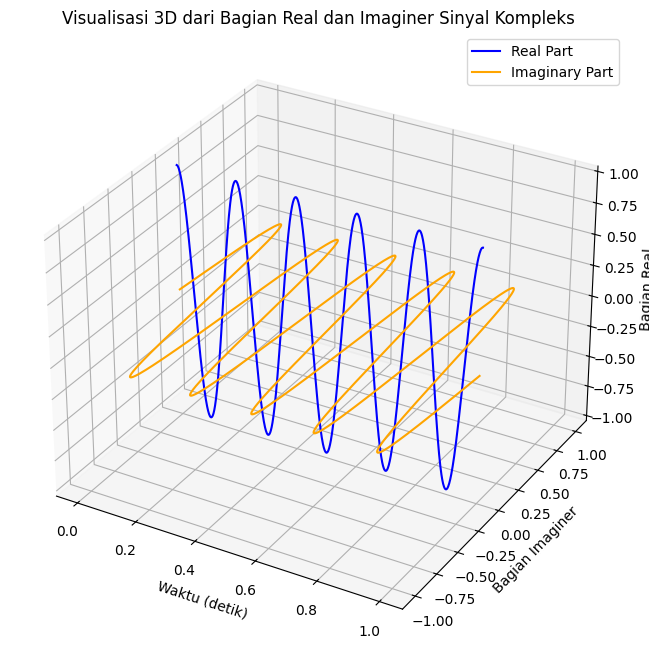

In [21]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting real and imaginary part of complex signal
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

## Ploting real part
ax.plot(time_axis, bagian_real, zs=0, zdir="y", label="Real Part", color="blue")

## Ploting imaginary part
ax.plot(time_axis, bagian_imaginer, zs=0, zdir="z", label="Imaginary Part", color="orange")

ax.set_title('Visualisasi 3D dari Bagian Real dan Imaginer Sinyal Kompleks')
ax.set_xlabel('Waktu (detik)')
ax.set_ylabel('Bagian Imaginer')
ax.set_zlabel('Bagian Real')
ax.legend()

plt.show()


Dapat dibuktikan bahwa:
- Bagian real dari sinyal kompleks berupa sinyal cosinus. (Terlihat sinyal dimulai dari 1)
- Bagian imajiner dari sinyal kompleks berupa sinyal sinus. (Terlihat sinyal dimulai dari 0)


## Properti Sinyal
Memahami lebih detail tentang parameter-parameter penyusun sinyal
1. **Sampling Rate / Frekuensi Sampling (`fs`)**: Ini adalah jumlah sampel yang diambil per detik dan diukur dalam Hertz (Hz). Sampling rate menentukan resolusi sinyal dalam domain waktu.
   
2. **Vektor Waktu (`t`)**: Ini merepresentasikan titik-titik waktu diskrit di mana sinyal diambil sampelnya. Biasanya merupakan vektor yang terdistribusi secara linier.

3. **Frekuensi (`f`)**: Ini adalah jumlah siklus per detik (Hz) untuk sinyal periodik seperti gelombang sinus. Di SMP kita belajar, bahwa satu siklus adalah satu putaran penuh dari gelombang sinus. Atau dapat dilihat sebagai satu bukit dan satu lembah dari gelombang sinus.

4. **Amplitudo (`A`)**: Ini adalah nilai maksimum dari sinyal.

5. **Phasa (`ϕ`)**: Merepresentasikan pergeseran sinyal dalam waktu. Sinyal fungsi `Cos` merupakan sinyal `Sin` yang mengalami perubahan fase

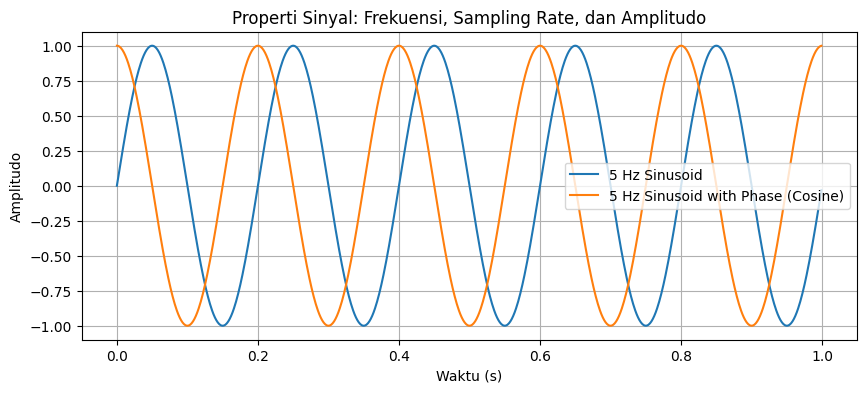

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Properti Sinyal
fs = 1000  # Sampling rate dalam Hz
T = 1      # Durasi sinyal dalam detik
t = np.linspace(0, T, fs * T, endpoint=False)  # Vektor waktu

# Frekuensi dan Amplitudo
f = 5   # Frekuensi sinyal dalam Hz
A = 1   # Amplitudo sinyal

# Phasa Sinyal
phi = np.pi / 2 ## 90 derajat

# Sinyal Gelombang 
signal = A * np.sin(2 * np.pi * f * t)
phased_signal = A * np.sin(2 * np.pi * f * t + phi)

# Plot Sinyal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label=f'{f} Hz Sinusoid')
plt.plot(t, phased_signal, label=f'{f} Hz Sinusoid with Phase (Cosine)')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.title('Properti Sinyal: Frekuensi, Sampling Rate, dan Amplitudo')
plt.legend()
plt.grid()
plt.show()


## Operasi dasar pada Sinyal

### 1. Scaling Amplitudo
Scaling atau perubahan amplitudo dilakukan dengan mengalikan sinyal dengan suatu faktor skalar.

$$ x'(t) = A \cdot x(t) $$

Efek dari operasi ini adalah perubahan besar kecilnya amplitudo sinyal tanpa mengubah frekuensi atau fase.

### 2. Translasi Waktu (Time Shifting)
Translasi waktu atau pergeseran sinyal dilakukan dengan menunda atau mempercepat sinyal dalam domain waktu.

$$ x'(t) = x(t - t_0) $$

Pergeseran positif $(t_0 > 0)$ menyebabkan sinyal bergeser ke kanan (delay / diperlambat), sementara pergeseran negatif menyebabkan sinyal bergeser ke kiri (advance / dipercepat).

### 3. Penjumlahan Sinyal
Menjumlahkan dua sinyal menghasilkan kombinasi keduanya, berguna dalam pemrosesan multi-sumber sinyal.

$$ y(t) = x_1(t) + x_2(t) $$

Hasil dari penjumlahan ini bisa jadi Konstruktif (sinyal menjadi lebih kuat) atau destruktif (Sinyal menjadi lebih lemah)

### 4. Perkalian Sinyal
Perkalian dua sinyal sering digunakan dalam modulasi dan demodulasi.

$$ y(t) = x_1(t) \cdot x_2(t) $$

Modulasi adalah proses untuk mengubah sinyal utama untuk mengirimkan data, biasanya sinyal utama dikalikan dengan sinyal sinusoidal frekuensi tinggi. Hal yang sebaliknya berlaku untuk demodulasi

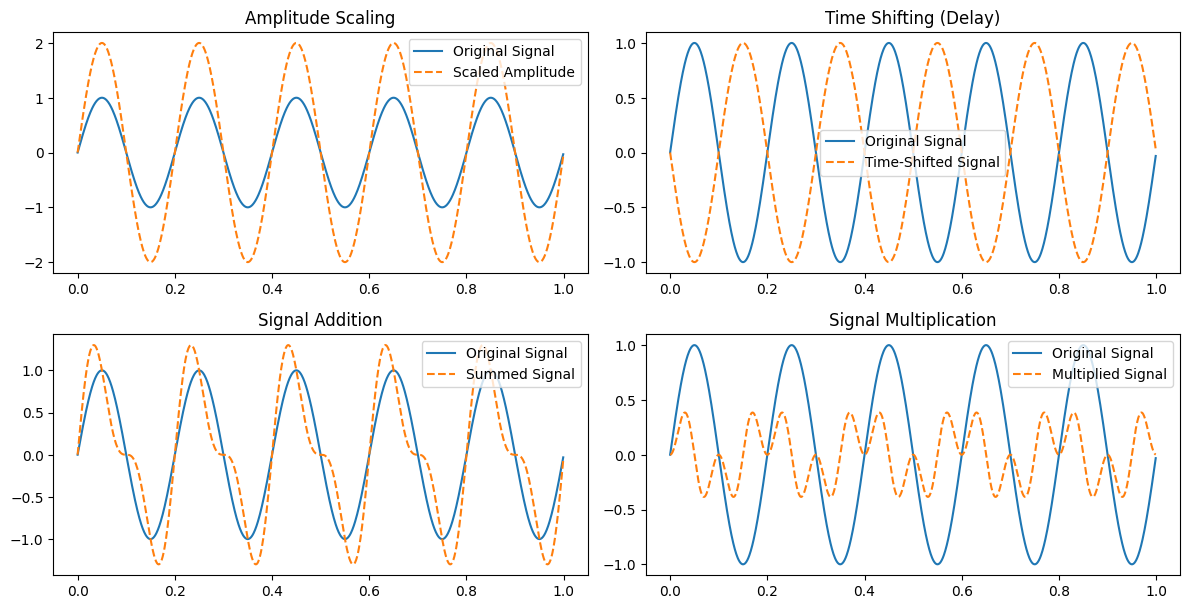

In [32]:
# Parameter dasar
fs = 1000  # Sampling rate (Hz)
T = 1      # Durasi sinyal (detik)
t = np.linspace(0, T, fs * T, endpoint=False)

# Sinyal sinusoidal
f = 5  # Frekuensi sinyal (Hz)
A = 1  # Amplitudo
signal = A * np.sin(2 * np.pi * f * t)

# Operasi 1: Scaling Amplitudo
scaled_signal = 2 * signal

# Operasi 2: Translasi Waktu (Delay)
delay_samples = int(0.1 * fs)  # Delay 100 ms
delayed_signal = np.roll(signal, delay_samples)

# Operasi 3: Penjumlahan Sinyal
signal2 = 0.5 * np.sin(2 * np.pi * 10 * t)
summed_signal = signal + signal2

# Operasi 4: Perkalian Sinyal
multiplied_signal = signal * signal2

# Plot hasil operasi
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(t, signal, label='Original Signal')
plt.plot(t, scaled_signal, linestyle='dashed', label='Scaled Amplitude')
plt.legend()
plt.title("Amplitude Scaling")

plt.subplot(4, 2, 2)
plt.plot(t, signal, label='Original Signal')
plt.plot(t, delayed_signal, linestyle='dashed', label='Time-Shifted Signal')
plt.legend()
plt.title("Time Shifting (Delay)")

plt.subplot(4, 2, 3)
plt.plot(t, signal, label='Original Signal')
plt.plot(t, summed_signal, linestyle='dashed', label='Summed Signal')
plt.legend()
plt.title("Signal Addition")

plt.subplot(4, 2, 4)
plt.plot(t, signal, label='Original Signal')
plt.plot(t, multiplied_signal, linestyle='dashed', label='Multiplied Signal')
plt.legend()
plt.title("Signal Multiplication")

plt.tight_layout()
plt.show()


---
## Tugas: `ho1`

#### Instruksi:

1. **Membuat Gelombang Sinus dan Cosinus**:
   - Buat array `t` yang berkisar dari 0 hingga 2 dengan langkah sebesar 0.0001.
   - Buat sinyal-sinyal berikut menggunakan array waktu ini:
     1. $y1 = 2 \cdot \sin(2 \pi \cdot 3 \cdot t + 0)$
     2. $y2 = 1 \cdot \cos(2 \pi \cdot 4 \cdot t + \pi/4)$
     3. $y3 = -1 \cdot \sin(2 \pi \cdot 5 \cdot t + \pi/2)$
     4. $y4 = 0.5 \cdot \cos(2 \pi \cdot 6 \cdot t + \pi)$

2. **Perbandingan Subplot**:
   - Buat gambar dengan 4 subplot (grid 2x2) untuk membandingkan semua sinyal secara berdampingan.
   - Setiap subplot harus berisi salah satu sinyal \( y1 \), \( y2 \), \( y3 \), dan \( y4 \).

3. **Pertanyaan Analisis**:
   - Jawab pertanyaan berikut dalam sel markdown di Jupyter Notebook Anda:
     1. Berapa amplitudo dan frekuensi masing-masing sinyal?
     2. Bagaimana pergeseran fase mempengaruhi posisi gelombang? (Anda dapat mengubah nilai fase pada sinyal-sinyal yang telah dibuat sesuka anda)
     3. Bandingkan sinyal-sinyal dengan amplitudo yang berbeda dan diskusikan bagaimana amplitudo mempengaruhi tampilan gelombang.
     4. Bandingkan sinyal-sinyal dengan pergeseran fase yang berbeda dan diskusikan bagaimana pergeseran fase mempengaruhi tampilan gelombang.

4. **Tugas Lanjutan**:
   - Buat sinyal baru $y5$ yang merupakan kombinasi dari $y1$ dan $y2$ yaitu, $y5 = y1 + y2$.
   - Plot $y5$ dan diskusikan bagaimana kombinasi dua gelombang sinus/cosinus mempengaruhi bentuk gelombang yang dihasilkan.

### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

### Pengumpulan
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Unggah tugas dalam bentuk .pdf dan .ipynb ke link submission
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan
- Jangan lupa, jika anda menggunakan bantuan dari sumber lain (online) atau AI (LLM), cantumkan referensi yang anda gunakan / screenshot hasil diskusi anda dengan asisten / link ke percakan dengan asisten. [Tutorial upload image ke .ipynb](https://www.youtube.com/watch?v=TCpN2eKGrIY)